In [1]:
import numpy as np
import scipy.fftpack
from scipy import ndimage
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os
from scipy.stats import norm
#import matplotlib.mlab as mlab
from SBR import sosf,acf,ps,sosfnorm#packagephd

In [2]:
input_file_1='datosNGC604r.txt'#astronomicalobsevations
input_file_2='datosNGC595r.txt'

In [3]:
data_1=pd.read_table(input_file_1)#PandasDataFrameOriginalData
data1=data_1.copy()#DataFrameForCalculations

In [4]:
data_2=pd.read_table(input_file_2)#PandasDataFrameOriginalData
data2=data_2.copy()#DataFrameForCalculations

In [5]:
m1=(data_1.RA<125)&(data_1.RA>85)
data1=data_1[m1]


In [6]:
a=[data1.RA,data1.DE,data1['RVHalpha']]
data1stat=pd.DataFrame(a).T
data1stat.columns=['X','Y','RV']
data1stat.describe()

,X,Y,RV
count,300.00000,300.000000,300.000000
mean,105.26850,9.390000,-274.647015
std,11.62634,6.261276,9.243500
min,85.82400,0.000000,-296.649181
25%,95.21100,4.000000,-280.900828
50%,105.26850,9.000000,-275.362067
75%,115.32600,15.000000,-269.766206
max,124.71300,19.600000,-231.143341


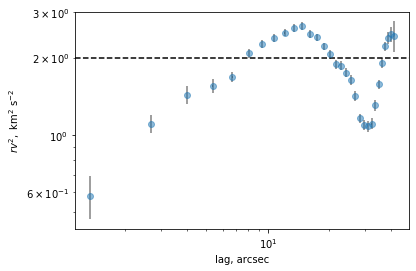

In [17]:
sfn_h1=sosfnorm(data1stat)

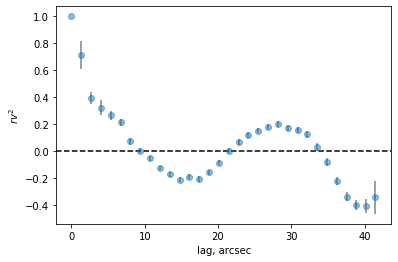

In [13]:
af_h1=acf(data1stat)

In [8]:
m2=(data2.RA<125)&(data2.RA>75)
data2=data2[m2]

In [9]:
a=[data2.RA,data2.DE,data2.RVHalpha]
data2stat=pd.DataFrame(a).T
data2stat.columns=['X','Y','RV']
data2stat.describe()

,X,Y,RV
count,341.000000,341.000000,341.000000
mean,99.875513,10.571848,-232.335572
std,14.737914,7.007872,13.169220
min,75.100000,0.000000,-264.950000
25%,87.170000,5.000000,-239.500000
50%,99.230000,11.000000,-231.420000
75%,112.640000,15.000000,-222.420000
max,124.710000,22.000000,-207.300000


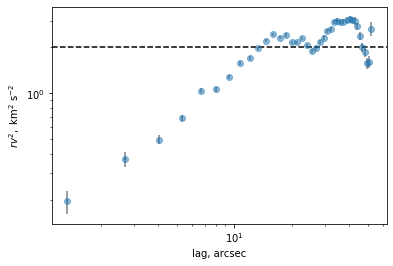

In [14]:
sfn_h2=sosfnorm(data2stat)

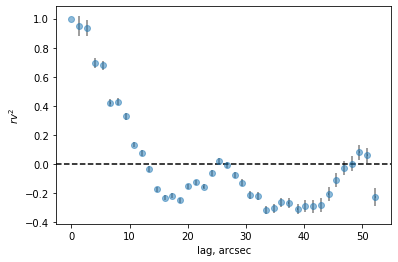

In [15]:
af_h2=acf(data2stat)

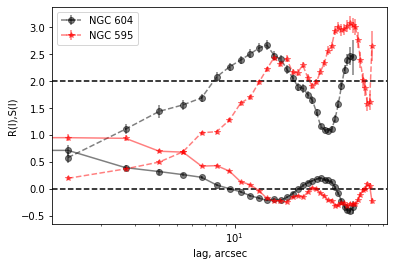

In [27]:
fig, ax=plt.subplots()
ax.errorbar(sfn_h1['Lag'],sfn_h1['Nmqvd'],xerr=sfn_h1.ErrX,yerr=sfn_h1.ErrY, fmt="o--", color='k', ecolor='k', alpha=0.5, label="NGC 604")
ax.errorbar(af_h1['Lag pc'],af_h1['Nmqvd'],xerr=af_h1.ErrX,yerr=af_h1.ErrY, fmt="o-", color='k', ecolor='k', alpha=0.5)
ax.errorbar(sfn_h2['Lag'],sfn_h2['Nmqvd'],xerr=sfn_h2.ErrX,yerr=sfn_h2.ErrY, fmt="*--", color='r', ecolor='r', alpha=0.5, label="NGC 595")
ax.errorbar(af_h2['Lag pc'],af_h2['Nmqvd'],xerr=af_h2.ErrX,yerr=af_h2.ErrY, fmt="*-", color='r', ecolor='r', alpha=0.5)
ax.set(xscale='log')
ax.axhline(y=2, color='k', linestyle='--')
ax.axhline(y=0, color='k', linestyle='--')
ax.set(xlabel='lag, arcsec', ylabel='R(l),S(l)')
plt.legend(loc='upper left')
